<a href="https://colab.research.google.com/github/newstage75/ML_study/blob/master/%E6%9C%80%E7%9F%ADPytorch/%EF%BC%97%E7%AB%A0_%E5%A4%9A%E5%80%A4%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#７章_多値分類

In [1]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [2]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [3]:
# torch関連ライブラリのインポート

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

In [4]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=4)

In [5]:
#データ読み込み

from sklearn.datasets import load_iris

iris = load_iris()

x_org, y_org = iris.data, iris.target

print('元データ', x_org.shape, y_org.shape)

元データ (150, 4) (150,)


In [6]:
print(x_org[:5,:])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [7]:
#1列目と3列目にしぼる(がく片（sepal）と花弁(petal)のlengtn)
x_select = x_org[:,[0,2]]

print('元データ', x_select.shape, y_org.shape)

元データ (150, 2) (150,)


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_select, y_org, train_size=75, test_size=75,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(75, 2) (75, 2) (75,) (75,)


In [9]:
#　データを正解値ごとに分割

x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

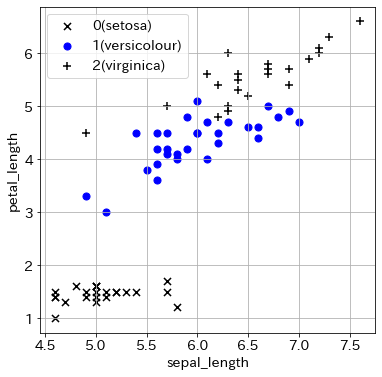

In [10]:
# 散布図の表示
plt.scatter(x_t0[:,0],x_t0[:,1],marker='x', c='k', s=50, label='0(setosa)')
plt.scatter(x_t1[:,0],x_t1[:,1],marker='o', c='b', s=50, label='1(versicolour)')
plt.scatter(x_t2[:,0],x_t2[:,1],marker='+', c='k', s=50, label='2(virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()

In [11]:
#モデル定義(入力次元)
n_input = x_train.shape[1]
n_output = len(list(set(y_train)))

print(f'n_input: {n_input} n_output: {n_output}')

n_input: 2 n_output: 3


In [12]:
#モデル定義
class Net(nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = nn.Linear(n_input, n_output)

    #書籍合わせ初期値１
    self.l1.weight.data.fill_(1.0)
    self.l1.bias.data.fill_(1.0)

  def forward(self, x):
    x1 = self.l1(x)
    return x1

#インスタンスの生成
net = Net(n_input, n_output)

In [13]:
#モデル確認
for parameter in net.named_parameters():
  print(parameter)

('l1.weight', Parameter containing:
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True))
('l1.bias', Parameter containing:
tensor([1., 1., 1.], requires_grad=True))


In [14]:
#モデル概要表示
print(net)

Net(
  (l1): Linear(in_features=2, out_features=3, bias=True)
)


In [15]:
#モデルのサマリー表示
summary(net, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      --                        --
├─Linear: 1-1                            [3]                       9
Total params: 9
Trainable params: 9
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [16]:
#最適化アルゴリズムと損失関数
criterion = nn.CrossEntropyLoss()
lr = 0.01
optimizer = optim.SGD(net.parameters(), lr=lr)

In [17]:
#勾配降下法
#データのテンソル化

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

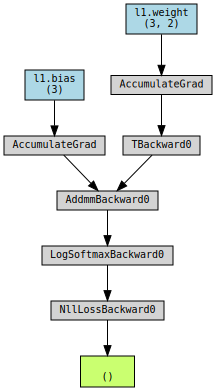

In [18]:
#計算グラフの可視化
outputs = net(inputs)

loss = criterion(outputs, labels)

g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [19]:
# 予測ラベル値の取得方法
# torch.max関数呼び出し
# 2つめの引数は軸を意味している。1だと行ごとの集計。
print(torch.max(outputs, 1))

torch.return_types.max(
values=tensor([12.0000, 12.7000,  7.6000, 13.0000, 12.3000,  7.6000,  7.3000, 11.1000,
        12.1000, 13.3000,  8.0000,  7.0000, 10.3000,  7.6000, 11.7000, 13.3000,
         7.4000, 13.5000,  8.2000,  8.4000, 12.7000,  6.6000,  7.9000, 12.2000,
        14.6000, 12.0000, 10.2000, 10.5000,  7.1000,  7.3000, 12.6000, 12.7000,
         7.4000,  7.7000, 10.8000, 11.5000, 11.5000, 14.0000, 12.8000, 10.8000,
        10.8000, 15.2000,  7.5000,  7.8000, 11.1000, 13.6000, 12.9000, 14.2000,
        12.7000,  7.6000, 10.9000,  7.0000, 10.9000, 11.2000,  7.4000, 11.7000,
        13.3000, 11.5000, 13.4000, 12.7000,  7.7000, 11.8000,  7.0000, 12.6000,
        11.7000, 10.9000,  9.2000, 12.2000, 10.4000, 12.1000,  7.5000,  9.1000,
        11.1000, 12.0000, 14.3000], grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 

In [20]:
torch.max(outputs, 1)[1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [21]:
#繰り返し計算
lr = 0.01

#インスタンス初期化
net = Net(n_input, n_output)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=lr)

num_epochs = 10000

#評価結果記録用
history = np.zeros((0,5))

In [25]:
#繰り返し計算メインループ
for epoch in range(num_epochs):
  #訓練フェーズ
  optimizer.zero_grad()

  outputs = net(inputs)

  loss = criterion(outputs, labels)

  loss.backward()

  optimizer.step()

  predicted = torch.max(outputs, 1)[1]

  train_loss = loss.item()
  train_acc = (predicted == labels).sum() / len(labels)

  #予測フェーズ
  outputs_test = net(inputs_test)

  loss_test = criterion(outputs_test, labels_test)

  predicted_test = torch.max(outputs_test, 1)[1]

  val_loss = loss_test.item()
  val_acc = (predicted_test == labels_test).sum() / len(labels_test)

  if ((epoch) % 10 == 0):
    print(f'Epoch[{epoch}/{num_epochs}], loss: {train_loss:.5f}, acc: {train_acc:.5f} val_loss: {val_loss:.5f}')
    item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
    history = np.vstack((history, item))

Epoch[0/10000], loss: 1.06791, acc: 0.40000 val_loss: 1.08234
Epoch[10/10000], loss: 1.02592, acc: 0.40000 val_loss: 1.05519
Epoch[20/10000], loss: 0.99614, acc: 0.40000 val_loss: 1.02409
Epoch[30/10000], loss: 0.96869, acc: 0.40000 val_loss: 0.99370
Epoch[40/10000], loss: 0.94307, acc: 0.42667 val_loss: 0.96515
Epoch[50/10000], loss: 0.91916, acc: 0.57333 val_loss: 0.93852
Epoch[60/10000], loss: 0.89685, acc: 0.70667 val_loss: 0.91373
Epoch[70/10000], loss: 0.87602, acc: 0.70667 val_loss: 0.89065
Epoch[80/10000], loss: 0.85657, acc: 0.70667 val_loss: 0.86917
Epoch[90/10000], loss: 0.83841, acc: 0.70667 val_loss: 0.84915
Epoch[100/10000], loss: 0.82142, acc: 0.72000 val_loss: 0.83048
Epoch[110/10000], loss: 0.80553, acc: 0.72000 val_loss: 0.81305
Epoch[120/10000], loss: 0.79064, acc: 0.72000 val_loss: 0.79676
Epoch[130/10000], loss: 0.77667, acc: 0.73333 val_loss: 0.78152
Epoch[140/10000], loss: 0.76356, acc: 0.74667 val_loss: 0.76724
Epoch[150/10000], loss: 0.75123, acc: 0.74667 val_l

In [28]:
#結果確認
print(f'初期状態:損失:{history[0,3]:.5f} 精度: {history[0,4]:.5f}')
print(f'最終状態:損失:{history[-1,3]:.5f} 精度: {history[-1,4]:.5f}')

初期状態:損失:1.08234 精度: 0.26667
最終状態:損失:0.19793 精度: 0.96000


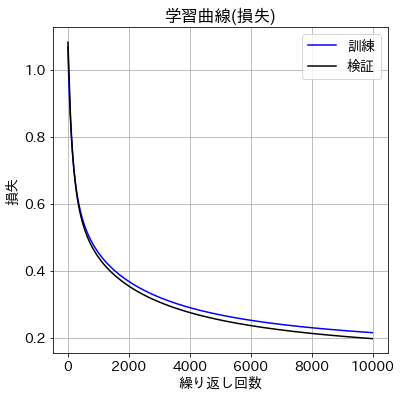

In [29]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

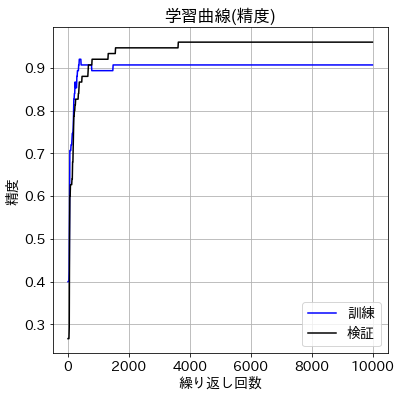

In [30]:
# 学習曲線の表示 (精度)

plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()